# **Air** **Quality** **Index** **prediction** **project**

---




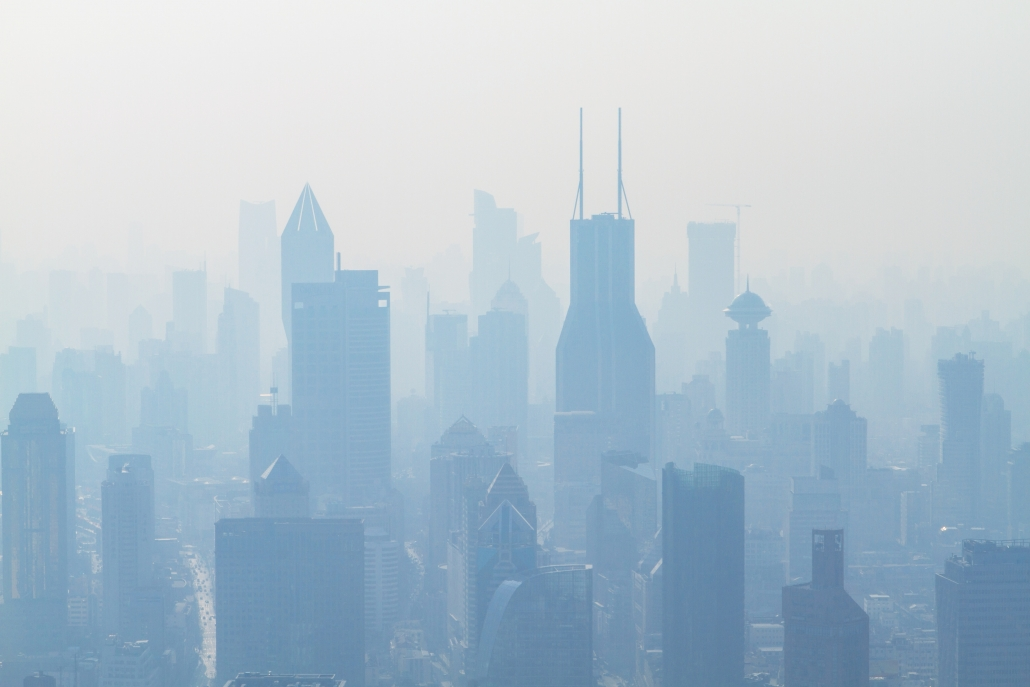

# **About** **Dataset**

---


**Context**
- Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

**Content**
- The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

**Cities**
- Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

---





# **Data** **feilds**:


---


- City: The name of the city for which the air quality data is recorded.
- PM2.5: Particulate Matter (PM) with a diameter of 2.5 micrometers or smaller.
- PM10: Particulate Matter (PM) with a diameter of 10 micrometers or smaller.
- NO: Nitric Oxide concentration.
- NO2: Nitrogen Dioxide concentration.
- NOx: The combination of Nitric Oxide (NO) and Nitrogen Dioxide (NO2).
- NH3: Ammonia concentration.
- CO: Carbon Monoxide concentration.
- SO2: Sulfur Dioxide concentration.
- O3: Ozone concentration.
- Benzene: Benzene concentration.
- Toluene: Toluene concentration.
- Xylene: Xylene concentration.
- AQI: Air Quality Index, a numerical scale indicating the level of air  pollution and associated health effects.

- AQI_Bucket: A categorical representation of AQI levels, such as "Good," "Moderate," "Unhealthy," etc.


---


In [ ]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# importing data
df=pd.read_csv("/content/drive/MyDrive/datasets/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# **Data** **Exploration** **and** **Validation**


In [ ]:
df.shape

(29531, 16)

In [ ]:
# This will show the information about data and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [ ]:
df["City"].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

In [ ]:
df["AQI_Bucket"].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

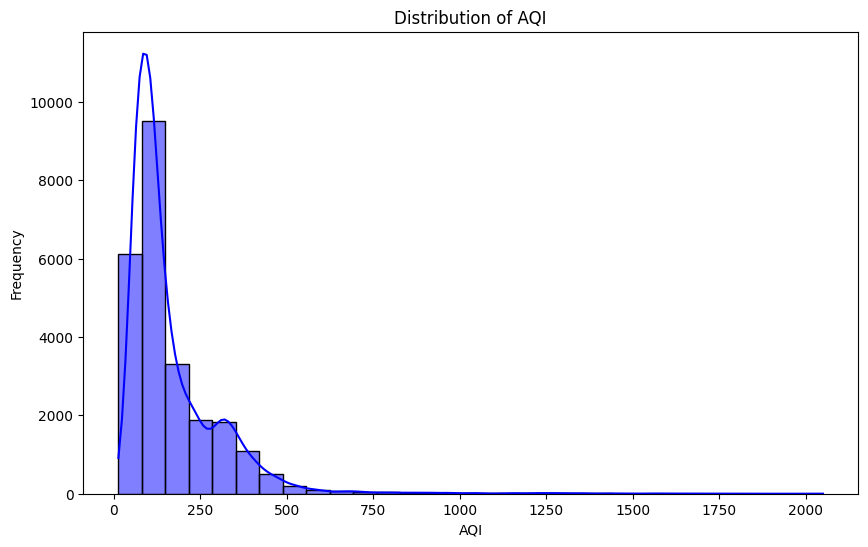

In [ ]:
# Explore distribution of target variable (AQI)
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

Histogram:
A histogram is a graphical representation of the distribution of a dataset. It is a way to visualize the underlying frequency distribution of a continuous variable. In a histogram, the data is divided into bins, and the number of observations falling into each bin is represented by the height of bars. Histograms are useful for understanding the central tendency, spread, and shape of a dataset.

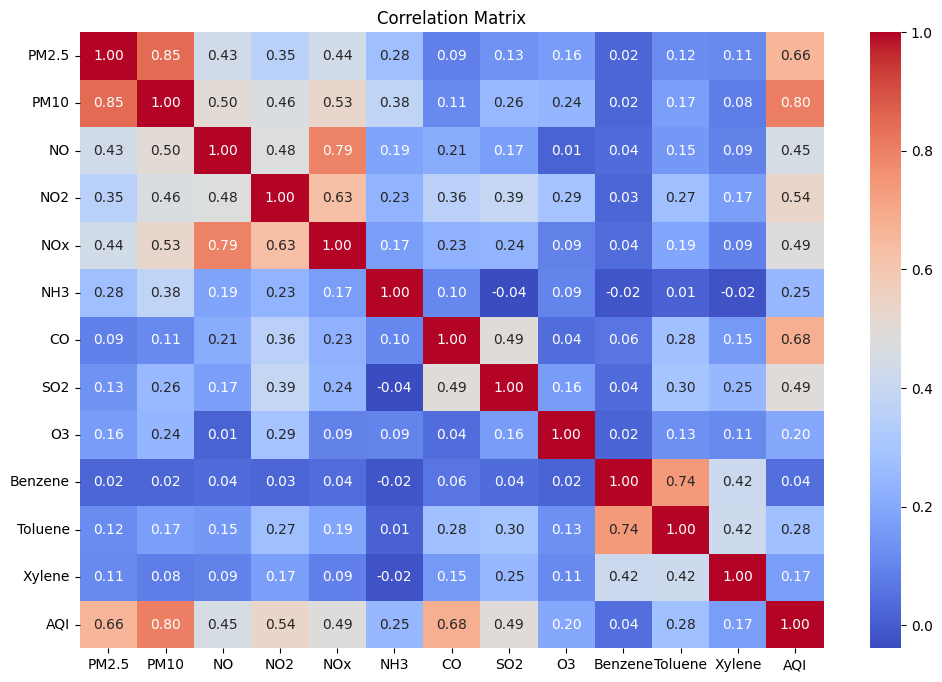

In [ ]:
# Explore correlations between variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

A heatmap is a graphical representation of data where values in a matrix are represented as colors. In the context of a correlation matrix, a heatmap visually displays the strength and direction of relationships between pairs of variables. Each cell in the heatmap represents the correlation coefficient between two variables, and the color indicates the strength and direction of the correlation.

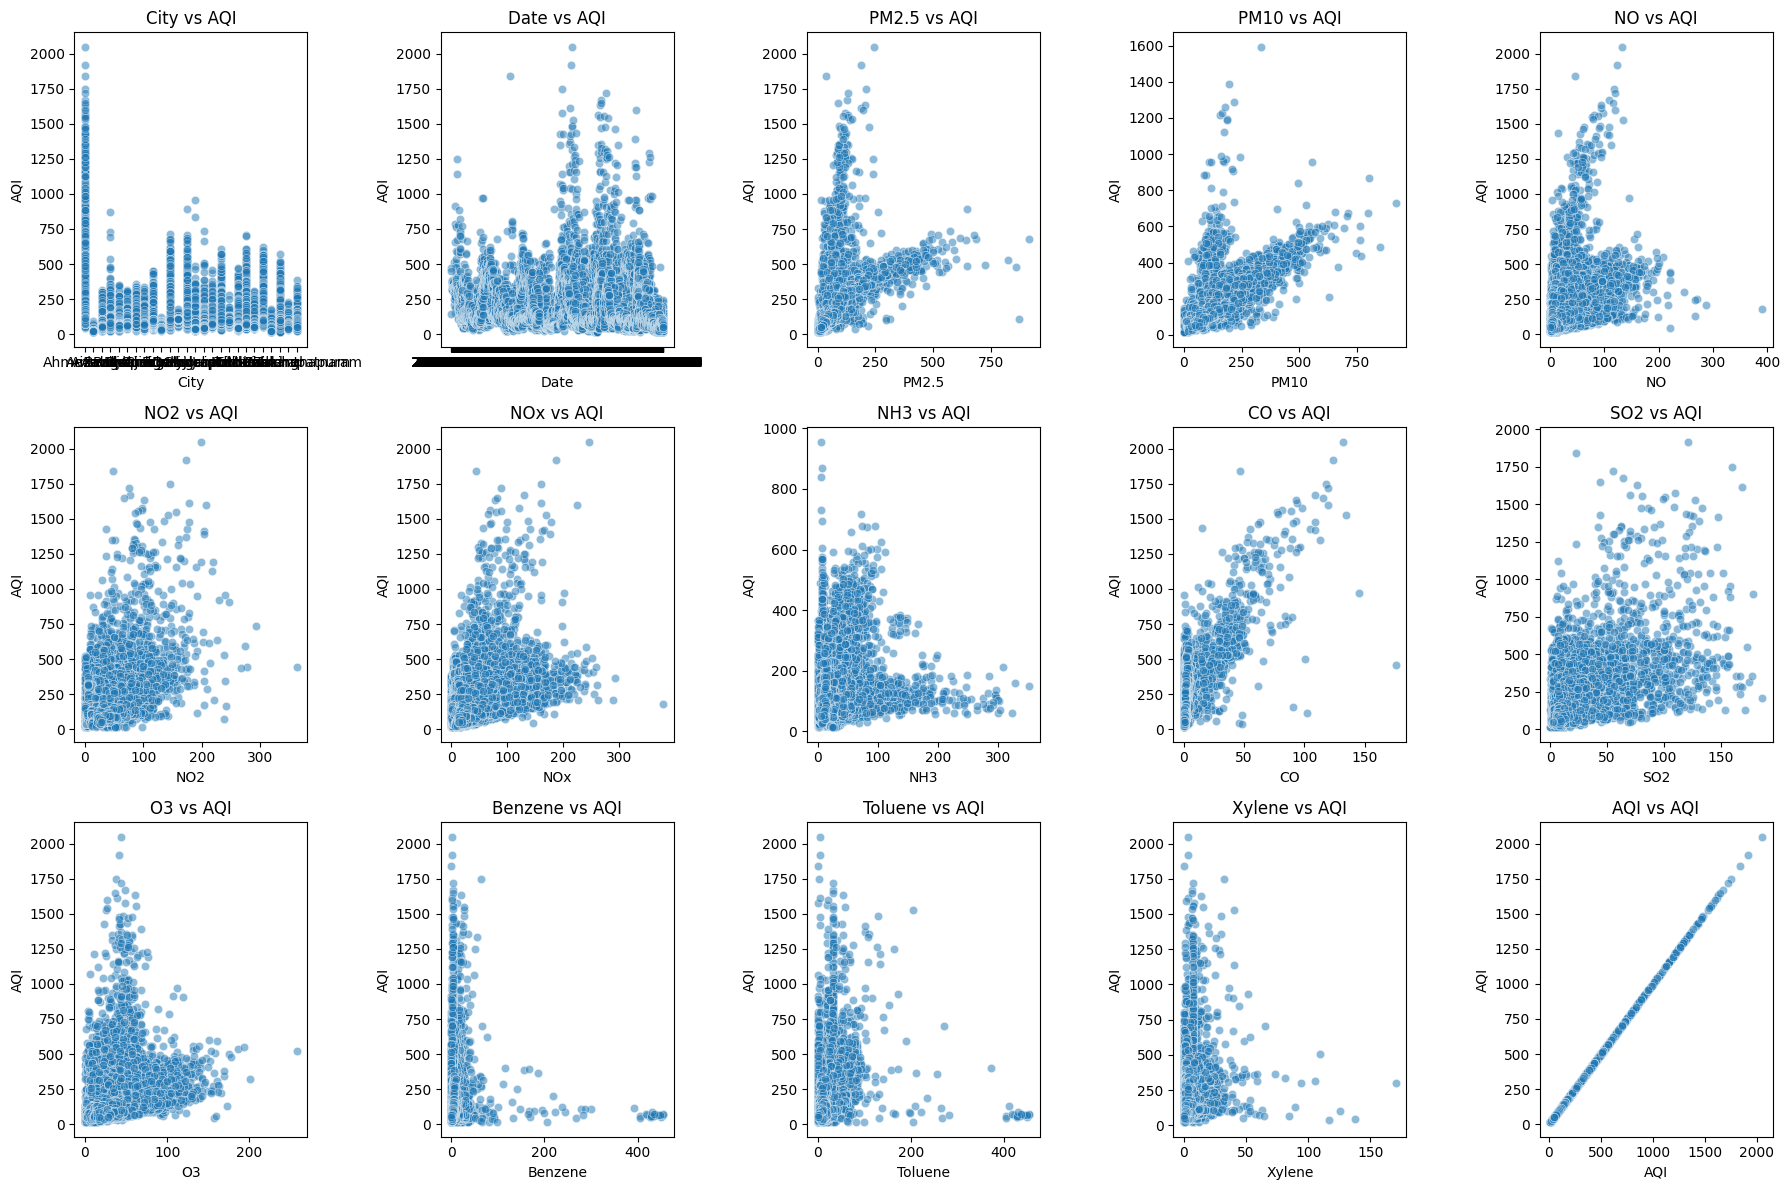

In [ ]:
# Explore relationships between features and target variable
plt.figure(figsize=(18, 12))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 5, i + 1)
    sns.scatterplot(x=column, y='AQI', data=df, alpha=0.5)
    plt.title(f'{column} vs AQI')

plt.tight_layout()
plt.show()

A scatter plot is a two-dimensional data visualization that uses points to represent individual observations in a dataset. Each point on the plot represents the values of two variables, and the position of the point depends on the values of these variables. Scatter plots are particularly useful for visualizing the relationship between two continuous variables.

<Axes: >

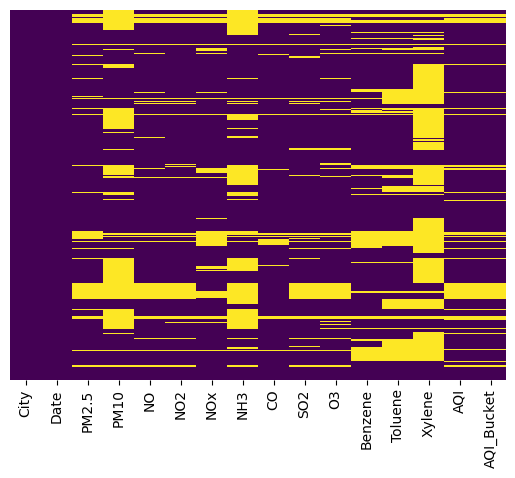

In [ ]:
#to check null values useing heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64




## **Data** **Cleaning**


In [ ]:
# Find the most frequent value (mode) in the "AQI_Bucket" column
most_frequent_value = df["AQI_Bucket"].mode()[0]

# Fill missing values in "AQI_Bucket" column with the most frequent value
df["AQI_Bucket"].fillna(most_frequent_value, inplace=True)

In [ ]:
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

In [ ]:
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

In [ ]:
nmean=df["NO"].mean()
df["NO"].fillna(nmean,inplace=True)

In [ ]:
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

In [ ]:
noxmean=df["NOx"].mean()
df["NOx"].fillna(noxmean,inplace=True)

In [ ]:
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

In [ ]:
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

In [ ]:
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

In [ ]:
omean=df["O3"].mean()
df["O3"].fillna(omean,inplace=True)

In [ ]:
bmean=df["Benzene"].mean()
df["Benzene"].fillna(bmean,inplace=True)

In [ ]:
tmean=df["Toluene"].mean()
df["Toluene"].fillna(tmean,inplace=True)

In [ ]:
xmean=df["Xylene"].mean()
df["Xylene"].fillna(xmean,inplace=True)

In [ ]:
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

In [ ]:
df=df.drop('Date',axis=1)

In [ ]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Moderate
1,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Moderate
2,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Moderate
3,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Moderate
4,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Moderate


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'City'.
df['City']= label_encoder.fit_transform(df['City'])

df['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
df.isnull().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

<Axes: >

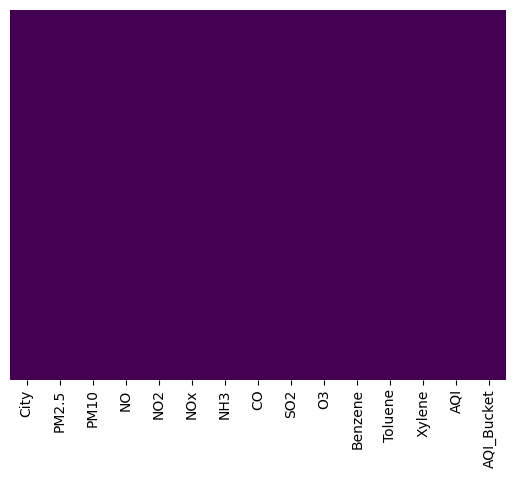

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **train** **test** **split**

In [ ]:
x=df.iloc[:,:13]
y=df.iloc[:,-2]

In [ ]:
x

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000
1,0,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000
2,0,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000
3,0,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000
4,0,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000
29527,25,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000
29528,25,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000
29529,25,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000


In [ ]:
y

0        166.463581
1        166.463581
2        166.463581
3        166.463581
4        166.463581
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64

In [ ]:
y = np.log1p(y)
y

0        5.120766
1        5.120766
2        5.120766
3        5.120766
4        5.120766
           ...   
29526    3.737670
29527    4.262680
29528    4.234107
29529    4.007333
29530    3.931826
Name: AQI, Length: 29531, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(23624, 13)
(5907, 13)
(23624,)
(5907,)


# **Model** **Building**

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# Make predictions on the test set
ypred = lr.predict(xtest)

In [ ]:
ypred

array([4.87417101, 4.87417101, 4.80137649, ..., 4.77499237, 4.51797149,
       4.95164106])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate R-squared (R2)
r1 = r2_score(ytest, ypred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 0.11
R-squared (R2): 0.70
Root Mean Squared Error (RMSE): 0.33


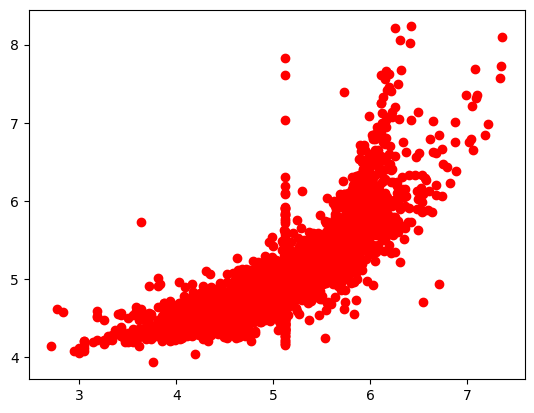

In [ ]:
plt.scatter(ytest,ypred,color="Red")

<Axes: xlabel='AQI', ylabel='Density'>

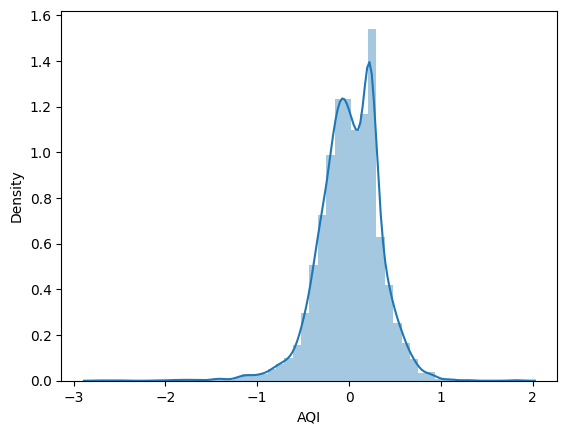

In [ ]:
sns.distplot(ytest-ypred,bins=50)

In [ ]:
lr.predict([[0,	26.93,74.380000,2.76,17.05,10.37,23.483476,0.46,37.700000,56.97,1.92,18.54,1.640000]])

array([4.68431705])

##DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
ypredDT=dt.predict(xtest)
ypredDT

array([5.1207659 , 5.1207659 , 4.82831374, ..., 4.84418709, 4.11087386,
       5.08140436])

<Axes: xlabel='AQI', ylabel='Density'>

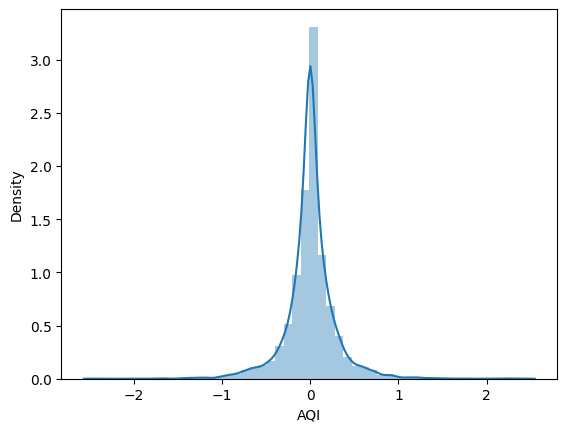

In [ ]:
sns.distplot(ytest-ypredDT,bins=50)

In [ ]:
dt.predict([[0,	26.93,74.380000,2.76,17.05,10.37,23.483476,0.46,37.700000,56.97,1.92,18.54,1.640000]])

array([4.8598124])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypredDT)

# Calculate R-squared (R2)
r2 = r2_score(ytest, ypredDT)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.08
R-squared (R2): 0.78


##RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
ypredrf=dt.predict(xtest)
ypredrf

array([5.1207659 , 5.1207659 , 4.82831374, ..., 4.84418709, 4.11087386,
       5.08140436])

<Axes: xlabel='AQI', ylabel='Density'>

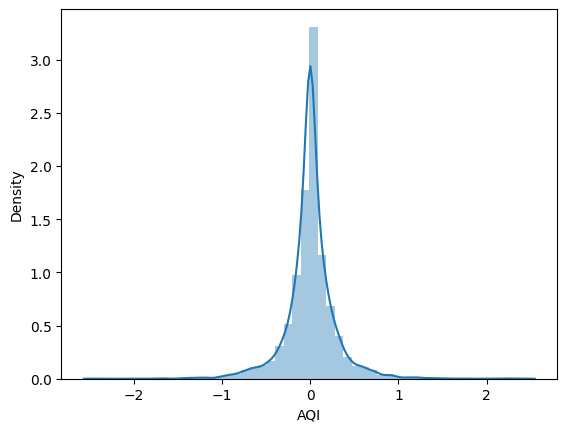

In [ ]:
sns.distplot(ytest-ypredrf,bins=50)

In [ ]:
rf.predict([[0,	26.93,74.380000,2.76,17.05,10.37,23.483476,0.46,37.700000,56.97,1.92,18.54,1.640000]])

array([4.84899696])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypredrf)

# Calculate R-squared (R2)
r3 = r2_score(ytest, ypredrf)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r3:.2f}")

Mean Squared Error (MSE): 0.08
R-squared (R2): 0.78


# **Best** **model**

In [ ]:
models = pd.DataFrame({'model':['Linear Regression','DecisionTreeRegressor','RandomForestRegressor'],'Score':[r1,r2,r3]})
models.sort_values(by='Score',ascending = False)

,model,Score
1,DecisionTreeRegressor,0.778511
2,RandomForestRegressor,0.778511
0,Linear Regression,0.699573
